# CISC873 - A0
### Submitted by: **Jagmeet Singh** 
* Date: October 8, 2020

Data Set Description: The data is from Wish.com and the task is to predict the rating of the product based on the features. It is a supervised learning problem where we have a labelled data availabel to train our different models.


*   The data is imported from Google Drive using pandas library.
*   seaborn and matplotlib libraries are used to plot the data.
*  The first step of the task is to do perform the data exploration which includes checking any anamalies, get general idea about useful features and plotting distributions.

Data Cleaning/Preprocessing:
* After the initial exploration analysis, the next step is to clean the data to make it ready for any type of model classification/prediction. The steps include removing NaN, deleting random data, normalizing, generalizing etc.

Model Building:
* The next step is to build a model for our analysis and checking its accuracy and other metrices.

**Models**
* **Linear Regression**: Initially I thought it to be a regression problem and did analysis using Linear Regression from scikit library.
* **Logistic Regression**: After realizing it is more of a classification problem, I started with the basic logistic regression and changed parameters to get good f1-score.
* **SGD Classifier**: Stochastic Gradient descent is a good classifier but it does not give good accuracy for the data set available.
* **Deep Neural Network**: I tried building neural network with 2,3,4 hidden layers but didn't get enough accuracy to use it for classification.
* **Decisoion Tree**: Decision Tree gave good f1 score and I tried enough parameter tuning to get a higher accuracy/f1-score.
* **Random Forest**: After realising that decision tree are good classifier, I go with ensemble method mainly Random forest and find the best f1-score for the data available both for validation data-set and test data set available on Kaggle.

**THe best f1-score is from Random forest with f1-score value = 0.82845 on the test data**


In [2]:
#Mounting google drive to import data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()  #Set aesthetic parameters in one step.
import matplotlib.pyplot as plt
%matplotlib inline
from pprint import pprint

#importing metric used 
from sklearn.metrics import f1_score
#Data to pandas dataframe
df_train = pd.read_csv('drive/My Drive/CISC873/A0/train_new.csv')
df_test = pd.read_csv('drive/My Drive/CISC873/A0/test_new.csv')

# Data Exploration

In [524]:
#Checking columns and names
df_train.columns

Index(['price', 'retail_price', 'currency_buyer', 'units_sold',
       'uses_ad_boosts', 'rating', 'rating_count', 'badges_count',
       'badge_local_product', 'badge_product_quality', 'badge_fast_shipping',
       'tags', 'product_color', 'product_variation_size_id',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'urgency_text',
       'origin_country', 'merchant_title', 'merchant_name',
       'merchant_info_subtitle', 'merchant_rating_count', 'merchant_rating',
       'merchant_id', 'merchant_has_profile_picture',
       'merchant_profile_picture', 'theme', 'crawl_month', 'id'],
      dtype='object')

In [525]:
#Data dimensions (rows, columns)
df_train.shape

(1094, 34)

In [ ]:
#viewing first five rows of data-set
df_train.head()

In [527]:
#Checking each column data type
df_train.dtypes

price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner              float64
urgency_text                     object
origin_country                   object
merchant_title                   object
merchant_name                    object


In [528]:
#Summary description of the data 
#max and min value are checked
#mean values for each column and count
df_train.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,349.0,1.094000e+03,1094.000000,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,1.0,2.678399e+04,4.036191,0.155393,772.207495
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.0,8.616171e+04,0.200397,0.362445,453.784430
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,1.0,4.000000e+00,2.941176,0.000000,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.926000e+03,3.918464,0.000000,382.250000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,8.225000e+03,4.045170,0.000000,752.500000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.306200e+04,4.166826,0.000000,1166.500000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,4.577519,1.000000,1572.000000


In [ ]:
#checking columns with NaN values
df_train.columns[df_train.isnull().any()]

Index(['product_color', 'product_variation_size_id', 'has_urgency_banner',
       'urgency_text', 'origin_country', 'merchant_name',
       'merchant_profile_picture'],
      dtype='object')

In [ ]:
#calculating total NaN values for each column
df_train.isnull().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             

# Data Preprocessing

### Techniques Used:
1) Checking columns with only one value by using 'unique' function and removing those.\
2) Removing NaN number from columns\
3) Extracting numbers and percentages from string values\
4) Converting string objects into useful categories

In [201]:
#Checking unique values for columns
print(pd.unique(df_train['currency_buyer'].values))
print(pd.unique(df_train['shipping_option_name'].values))
print(pd.unique(df_train['origin_country'].values))
print(pd.unique(df_train['theme'].values))
print(pd.unique(df_train['crawl_month'].values))

print(pd.unique(df_train['has_urgency_banner'].values))
print(pd.unique(df_train['urgency_text'].values))
print(pd.unique(df_train['inventory_total'].values))

['EUR']
['Livraison standard' 'Standard Shipping' 'الشحن القياسي'
 'Expediere Standard' 'Envío normal' 'Standardowa wysyłka' 'Envio Padrão'
 'Standardversand' 'Spedizione standard' 'Standart Gönderi'
 'Livraison Express' 'ការដឹកជញ្ជូនតាមស្តង់ដារ' 'Стандартная доставка']
['CN' 'US' 'GB' nan 'SG' 'VE']
['summer']
['2020-08']
[nan  1.]
[nan 'Quantité limitée !' 'Réduction sur les achats en gros']
[50  1  9 37  2 36]


In [4]:
#making a dataframe which holds the id for the test data set
df_id = pd.DataFrame({'id': df_test['id']})

'urgency text' has only two unique values that also corresponds to 'has_urgency_text', thus these two columns depicts same feature and NaN can be replace by 0 which means 0 corresponds to 'no urgency text' and 1 means 'urgency text'.

In [5]:
#theme , #currency buyer and crawl month have only one value so can be drop off
df_train = df_train.drop(columns=['merchant_id', 'merchant_profile_picture', 'id', 'tags', 'theme', 'crawl_month', 'currency_buyer','has_urgency_banner'])
df_train = df_train.fillna(0)

df_train = df_train.loc[df_train['rating'].isin([1, 2, 3, 4, 5])] #dropping any data which has anomaly rating value

df_test = df_test.drop(columns=['merchant_id', 'merchant_profile_picture', 'id', 'tags', 'theme', 'crawl_month', 'currency_buyer','has_urgency_banner'])

In [6]:
# splitting. alternative in sklearn train_test_split. 
# I use holdout method for validation, but you are encouraged to use anything else e.g. cross_validation
msk = np.random.rand(len(df_train)) < 0.66 #splitting ratio
train = df_train[msk]
val = df_train[~msk]

In [7]:
# Processing the categorical features.
# a dictionary that contains the mapping for each feature
dict_cat = {}
# columns that are of categorical value
cat_cols = df_train.columns[df_train.dtypes==object].to_list()

In [8]:
cat_cols

['product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'urgency_text',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle']

In [9]:
def cat_digit(col):  
    # build the mapping
    encoded = col.astype('category').cat.codes
    # store the mapping
    dict_cat[col.name] = dict(zip(np.asarray(col), np.asarray(encoded)))
    return encoded

In [10]:
#applying the categorical to the columns to make them useful features
train[cat_cols] = train[cat_cols].apply(lambda col: cat_digit(col))

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [11]:
#checking the dimensions of the data after preprocessing
np.shape(train)

(742, 26)

In [12]:
print('categorical features')
pprint(list(dict_cat.keys()))

categorical features
['product_color',
 'product_variation_size_id',
 'shipping_option_name',
 'urgency_text',
 'origin_country',
 'merchant_title',
 'merchant_name',
 'merchant_info_subtitle']


In [13]:
print('Lets see what the mapping for column origin_country :')
pprint(dict_cat['origin_country'])
print('It is a string to integer mapping')

Lets see what the mapping for column origin_country :
{0: 0, 'CN': 1, 'GB': 2, 'US': 3, 'VE': 4}
It is a string to integer mapping


In [14]:
# then we will use the mappings built from the training set, to transform the validation set
val[cat_cols] = val[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))
# for string values that not seen in training set, we replace it with -1
val = val.fillna(-1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


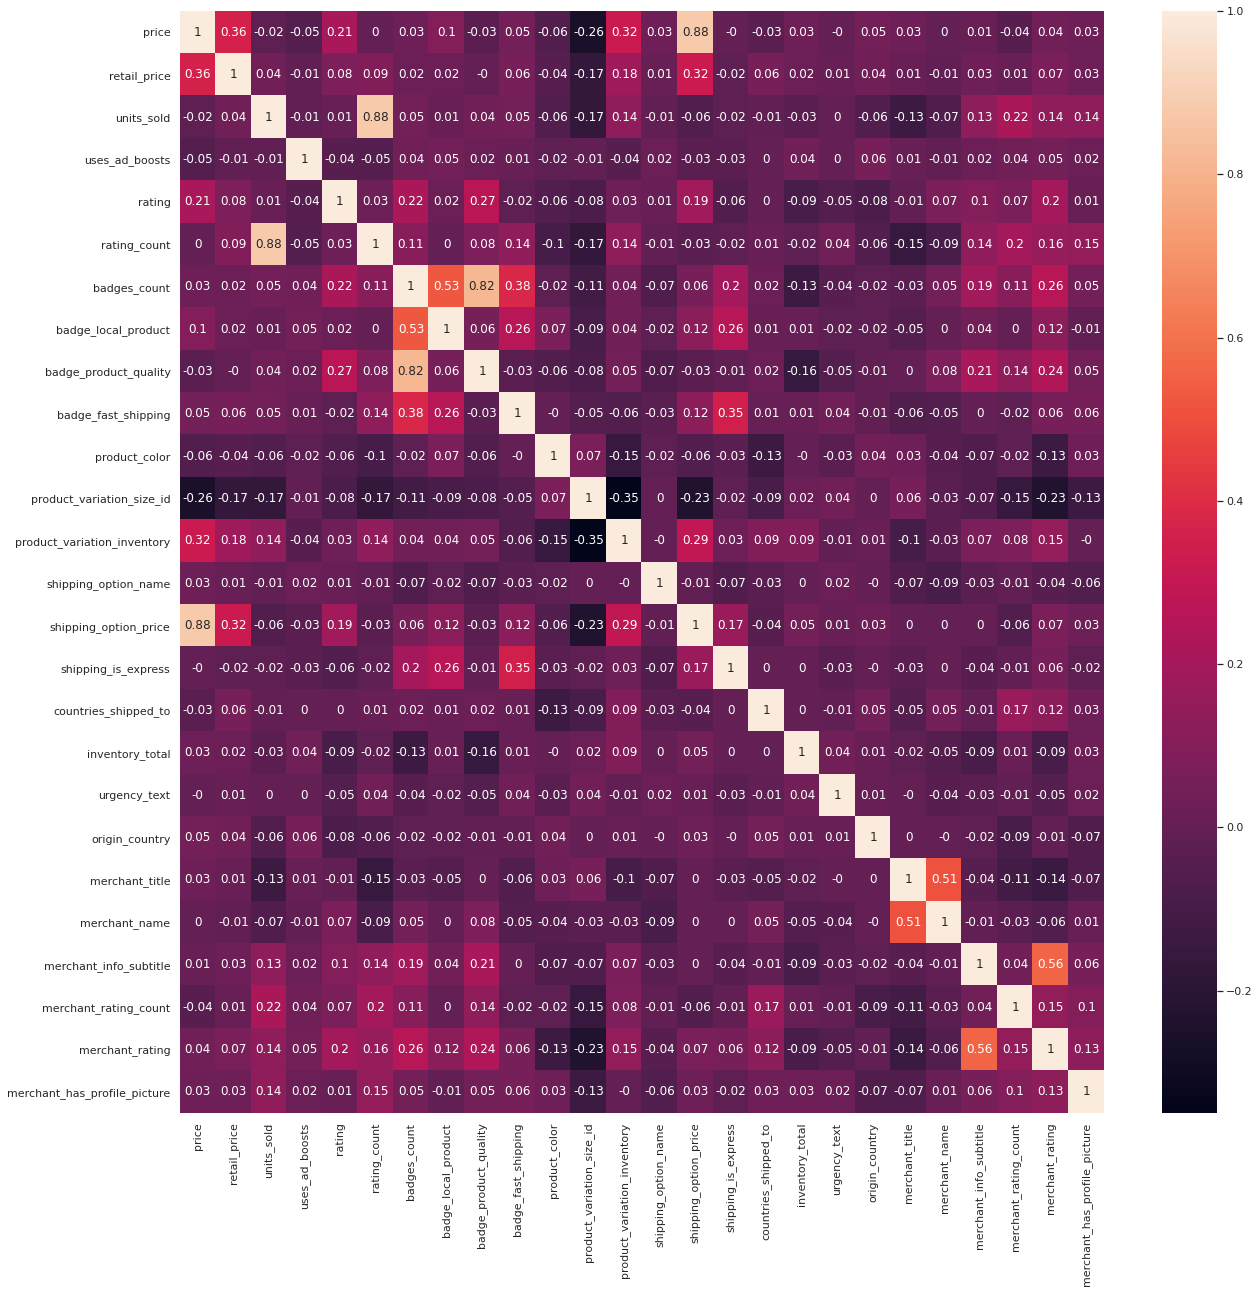

In [539]:
#plotting the heat map to find the correlation among the features
sns.set(rc={'figure.figsize':(20.7,20.27)})
ax = sns.heatmap(data=train.corr().round(2),annot=True)


In [15]:

# once you are happy with your local model, let's prepare a submission
# we need to apply the same preprocessing steps on the testing set as you did before you train the model

df_test = df_test.fillna(0)

df_test[cat_cols] = df_test[cat_cols].apply(lambda col: col.map(dict_cat[col.name]))

# again, not-seen string value filled with -1
df_test = df_test.fillna(-1)

# Models - Supervised Learning

**The target variable (column) is the 'rating' of the product while all other columns in the clean data set will be used as features.**\
**The complete data is numeric**\
**It is a classification problem to find the rating of an unknown product from its features**

In [16]:
#Defining train data features and labels
df_train_feature = train.drop(columns=['rating'])
df_train_label = train[['rating']].copy()

#defining validation features and labels
df_val_feature = val.drop('rating', axis=1)
df_val_label = val['rating']

#converting into numpy arrays (it becomes easy for some methods to work with numpy arrays)
df_train_label_np = df_train_label.values.flatten()
df_train_feature_np = df_train_feature.to_numpy()

df_val_feature_np = df_val_feature.to_numpy()
df_val_label_np = df_val_label.values.flatten()

## Model 1: Linear Regression

* The first analysis was using linear regression and linear_model, LinearRegression is used from sklearn library for training and testing

In [17]:
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score

In [18]:
#fitting the data using linear regression
reg = LinearRegression().fit(df_train_feature, df_train_label)

In [19]:
reg.coef_

array([[ 3.99155795e-02,  3.66457511e-05,  9.81096178e-07,
        -2.98544960e-02, -6.58303454e-06,  2.14464625e-01,
        -3.57431821e-01,  2.74442763e-01,  2.97453683e-01,
        -8.65006485e-04,  3.83235482e-04, -2.58162775e-03,
         2.46203974e-02, -9.48393085e-03, -1.45130772e+00,
         1.00634959e-03, -6.54373586e-03, -8.74724714e-02,
        -1.95417437e-01, -2.31544383e-04,  1.21088135e-04,
         5.97107331e-05, -6.32553569e-08,  5.59951681e-01,
        -2.42224607e-02]])

In [31]:
result = reg.predict(df_val_feature)
result = result.flatten()
result = result.astype('int') + 1.0

In [32]:
#checking the fitted model on validation data-set to calculate f1-score
val_score = f1_score(df_val_label, result, average='micro')
print(val_score)

0.49002849002849


* The Linear Regressor performs very badly. The f1 score is very less and the division seems to be more random

## Model 2: Logistic Regression

* The second model tried was logistic regression as it is the basic model for classification problem

In [33]:
#Logistic Regression from Scikit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

In [56]:
#fitting the model to the data
clf = LogisticRegression(max_iter=2500,solver='saga').fit(df_train_feature, df_train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [57]:
#checking the f1-score for the training data to compare with validation data
pred_val = clf.predict(df_train_feature)
val_score = f1_score(df_train_label_np, pred_val, average='micro')
print(val_score)

0.7237196765498652


In [58]:
#checking the fitted model on validation data-set to calculate f1-score
pred_val = clf.predict(df_val_feature)
val_score = f1_score(df_val_label, pred_val, average='micro')
print(val_score)

0.6752136752136753


* HB -> High Bias
* HV -> High Variance
* LB -> Low Bias
* LV -> Low Variance

Logictic Regression:

Parameter Changed | Train_f1_score | Val_f1_score | Comment
--- | --- | --- |---
 Basic regressor| 0.72 | 0.66 | both train and val are low and far away. HB and HV
 no penality | 0.72 | 0.67 | again both scores low. HB, HV
 max_iter = 1500 | 0.72 | 0.67 | no difference
 max_iter = 2500 | 0.72 | 0.67 | no difference
 solver = 'saga' | 0.72 | 0.67 | no difference




## Model 3: SGD Classifier

* The third method used is the SGD classifier

In [59]:
#importing libraris for the SGD classifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


In [88]:
#fitting the model on the training data
clf = make_pipeline(StandardScaler(),SGDClassifier())
clf.fit(df_train_feature, df_train_label_np)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [89]:
#calculating f1-score for train data
result_SGD_val = clf.predict(df_train_feature)
val_score = f1_score(df_train_label_np, result_SGD_val, average='micro')
print(val_score)

0.7129380053908356


In [90]:
#calculating f1-score for validation data-set
result_SGD_val = clf.predict(df_val_feature_np)
val_score = f1_score(df_val_label, result_SGD_val, average='micro')
print(val_score)

0.6809116809116809


SGD Classifier:

Parameter Changed | Train_f1_score | Val_f1_score | Comment
--- | --- | --- |---
 default classifier| 0.71 | 0.68 | both train and val are low and far away. HB and HV
l2 penality | 0.67 | 0.66 | both score low but almost same so no over training
 max_iter = 8000 | 0.73 | 0.68 | both low and separated implies over training with HB and HV
tol = 1e-8 | 0.64 | 0.64 | low scores but under trained
 epsilon=0.001 | 0.62 | 0.53 | undertrained

\
* From the analysis the default values gave the maximum f1-score for both training and validation data sets


In [ ]:
#predicting the rating for the test data-set
result_SGD = clf.predict(df_test)

In [ ]:
#converting rating into format given for submission and downloading
df_result_SGD = pd.DataFrame({'id': df_id['id'], 'rating': result_SGD})
df_result_SGD.to_csv('df_result_SGD.csv',index=False)
files.download("df_result_SGD.csv")

## Model 4: Deep Neural Network

* DNN are tested for the same training data by changing different parameters

In [91]:
#importing libraries
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [92]:
#converting to categorial for keras DNN
from keras.utils.np_utils import to_categorical 
categorical_labels = to_categorical(df_train_label_np, num_classes=6)
categorical_labels

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [93]:
categorical_labels_val = to_categorical(df_val_label_np, num_classes=6)

In [94]:
#Defining the f1-score metric
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision
    
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [103]:
#building deep neural network
import tensorflow as tf

#different optimizers
opt = keras.optimizers.Adam(learning_rate=0.001)
opt_ada = tf.keras.optimizers.Adadelta(learning_rate=0.008, rho=0.95, epsilon=1e-07, name="Adadelta")

model = Sequential()
model.add(Dense(32, input_dim=25, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(6, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy',f1_m])

In [105]:
#model fitting 
history = model.fit(df_train_feature_np,
                   categorical_labels, validation_data=(df_val_feature_np, categorical_labels_val),
                   epochs=10,
                   batch_size=16,verbose=1
                   )

Epoch 1/10
47/47 [==============================] - 0s 3ms/step - loss: 0.7328 - accuracy: 0.7601 - f1_m: 0.7628 - val_loss: 1.1915 - val_accuracy: 0.6980 - val_f1_m: 0.6973
Epoch 2/10
47/47 [==============================] - 0s 2ms/step - loss: 0.7363 - accuracy: 0.7601 - f1_m: 0.7597 - val_loss: 1.1858 - val_accuracy: 0.6952 - val_f1_m: 0.6945
Epoch 3/10
47/47 [==============================] - 0s 2ms/step - loss: 0.7280 - accuracy: 0.7655 - f1_m: 0.7700 - val_loss: 1.2092 - val_accuracy: 0.6980 - val_f1_m: 0.6937
Epoch 4/10
47/47 [==============================] - 0s 2ms/step - loss: 0.7495 - accuracy: 0.7655 - f1_m: 0.7638 - val_loss: 1.2222 - val_accuracy: 0.6923 - val_f1_m: 0.6926
Epoch 5/10
47/47 [==============================] - 0s 2ms/step - loss: 0.7360 - accuracy: 0.7655 - f1_m: 0.7664 - val_loss: 1.2335 - val_accuracy: 0.6895 - val_f1_m: 0.6897
Epoch 6/10
47/47 [==============================] - 0s 2ms/step - loss: 0.7436 - accuracy: 0.7615 - f1_m: 0.7654 - val_loss: 1.226

DNN Classifier:

Parameter Changed | Train_f1_score | Val_f1_score | Comment
--- | --- | --- |---
epochs = 300| 0.72 | 0.67 | both train and val are low and far away. HB and HV
batch_size =16 | 0.67 | 0.66 | both score low but almost same so no over training but under trained
 optimizer = Adadelta | 0.05 | 0.00 | very bad optimizer
layers: 32,64,6 | 0.82 | 0.70 | Overtrained 
Dropout(0.4) for overtrain | 0.76 | 0.70 | no trained good behaves bad on validation data

\
From the analysis, the best parameters for DNN are 
* Layers: 32, 64, 32
* epochs: 1000
* batch_size: 32
* optimizer: Adam


In [ ]:
#predicting result for the test data
res  = model.predict(df_test)
res = res.astype('float')
#converting result to 1-D array with max weight for the category
result_DNN= np.argmax(res, axis=1, out=None)
result_DNN = result_DNN.astype('float')

In [ ]:
#Saving the predicted values
from google.colab import files
df_result_DNN = pd.DataFrame({'id': df_id['id'], 'rating': result_DNN})

df_result_DNN.to_csv('df_result_DNN.csv',index=False)
files.download("df_result_DNN.csv")

## Model 5: Decision Tree

* decision tree are used as they are goood classifier

In [153]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier

#model making
clf = DecisionTreeClassifier(max_depth=7)

#fitting
clf = clf.fit(df_train_feature_np , df_train_label_np)

In [154]:
#calculating f1-score for train data
result_SGD_val = clf.predict(df_train_feature)
val_score = f1_score(df_train_label_np, result_SGD_val, average='micro')
print(val_score)

0.8692722371967655


In [155]:
#calculating f1-score for val data
val_res = clf.predict(df_val_feature)
val_score = f1_score(df_val_label, val_res, average='micro')
print(val_score)

0.7492877492877493


Decision Tree Classifier:

Parameter Changed | Train_f1_score | Val_f1_score | Comment
--- | --- | --- |---
defaullt| 0.99 | 0.65 | overtrained
max_depth = 2 | 0.76 | 0.72 | both almost same but far from good optimization
min_samples_leaf=3 | 0.76 | 0.72| no effect
random_State=10 | 0.76 | 0.72 | no effect 
criterion='entropy | 0.99 | 0.70 | overtrained

\
From the analysis, the best parameters for decision tree are
* default parameters with max_depth=7 



In [ ]:
df_result_DT = clf.predict(df_test)

In [ ]:
from google.colab import files
df_result_DT = pd.DataFrame({'id': df_id['id'], 'rating': res})
df_result_DT.to_csv('df_result_DT.csv',index=False)
files.download("df_result_DT.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model 6: Random Forest

* Random Forest is an ensemble method to classify

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [182]:
clf=RandomForestClassifier(n_estimators=150)
clf.fit(df_train_feature_np,df_train_label_np)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [183]:
res_tes= clf.predict(df_train_feature)
val_score = f1_score(df_train_label, res_tes, average='micro')
print(val_score)

0.9973045822102425


In [184]:

res_val= clf.predict(df_val_feature_np)
val_score = f1_score(df_val_label, res_val, average='micro')
print(val_score)

0.774928774928775


Random Forest Classifier:

Parameter Changed | Train_f1_score | Val_f1_score | Comment
--- | --- | --- |---
defaullt| 0.99 | 0.77 | overtrained
n_estimators=100 | 0.99 | 0.75 | ovetrained
max_depth=6 | 0.85 | 0.75| improvement from previous but needs more tuning
min_sample_split=3 | 0.84 | 0.73 | no improvemnet 
random_state=42 | 0.84 | 0.75 | still overtrained


In [375]:
res = clf.predict(df_test)

In [376]:
from google.colab import files
df_result_DT = pd.DataFrame({'id': df_id['id'], 'rating': res})
df_result_DT.to_csv('df_result_RF.csv',index=False)
files.download("df_result_RF.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Questions

### Why Data Mining is a misnomer? What is another preferred name?
Ans: Data Mining does not mean to dig something and have data from that. It is not the extraction of the data but to find useful knowledge from data by considering certain features and applying different models. According to me, data exploration and analytics would be a another prefer name for data mining.
### What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
Ans: The general knowledgle discovery process is a method of finding useful patterns from the data by identifying key features. Data engineer focused on building the infrastructure to store data, manipulate data that can be available for analysis whereas data scientists perform analysis on the data which is a statistical/mathematical model fitting to the data to find the useful knowledge.
### In data mining, what is the difference between prediction and categorization?
Ans: In data mining, prediction refers to find a predicted numeric value using a model of a unknown dataset based on its features. The answer is a number. On the other hand categorization refers to categorize the unknown dataset to one of the defined category based on the data features and model trained. So, prediction refers to regression and categorization refers to classification problem.
### In a linear model, which regularization method encourages sparsity?
Ans: The 'l1' penalisation encourages sparsity in linear model whereas 'l2' normalisation discourage sparsity. 
### Why we need GD for optimization, rather than simply use linear algebra to solve a simple linear model?
Ans: One of the main reason for using gradient descent is the computational complexity. The linear algebra becomes very time consuming while working with large datasets. On the other hand gradient descent provides the solution to this as it is based on iteration process which keep improving with each iteration.
### In terms of bias and variance, defines what is overfitting and under fitting?
Ans: Overfitting is a problem when we have a very good model for train data but it works bad on the validation and test data. These are low bias and high variance. On the other hand underfitting happens when the model behaves badly on training data and fails to capture the complete knowledge from the data. The models have high bias and low variance.
### Why data science/machine learning is a bad idea in the context of information security?
Ans: According to me, machine learning models can behave well on the type of data/security features they are trained off. A new bug/threat may not be detected by machine learning models which may lead to information loss or informtion leak. 